Advance DL Course

Vahid Mirahi, Kiumars Zamanzade, Behnam Amiri Ramshe

In [1]:
import numpy as np
import pandas as pd

In [2]:
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/DL Advance course(AIDA)/Exercises/heart_rate.csv'
df = pd.read_csv(path, header=0, index_col=0,parse_dates=True, squeeze=True)
print(list(df.columns))
df

['T2', 'T3', 'T4']


,T2,T3,T4
T1,,,
84.2697,91.4634,60.4839,59.2885
84.2697,91.4634,60.4839,59.2885
84.0619,91.1834,60.4606,59.2885
85.6542,91.8788,60.3391,58.8973
87.2093,91.1772,60.0762,58.4359
...,...,...,...
103.7900,98.6842,NaN,NaN
101.6230,98.6842,NaN,NaN
99.5679,99.0005,NaN,NaN


In [5]:
f1 = np.array(df['T2'].astype(float))
idx = pd.date_range('00:00:00', periods=f1.shape[0], freq="0.5S")
f1

array([91.4634, 91.4634, 91.1834, ..., 99.0005, 99.3273, 99.5205])

In [6]:
# creating datafram
s = {'HR':f1}
HR = pd.DataFrame(s, index=idx, columns=['HR'])
HR

,HR
2022-04-10 00:00:00.000,91.4634
2022-04-10 00:00:00.500,91.4634
2022-04-10 00:00:01.000,91.1834
2022-04-10 00:00:01.500,91.8788
2022-04-10 00:00:02.000,91.1772
...,...
2022-04-10 00:14:57.500,98.6842
2022-04-10 00:14:58.000,98.6842
2022-04-10 00:14:58.500,99.0005
2022-04-10 00:14:59.000,99.3273


In [7]:
HR1 = HR.resample('S').mean()
HR1

,HR
2022-04-10 00:00:00,91.46340
2022-04-10 00:00:01,91.53110
2022-04-10 00:00:02,90.48820
2022-04-10 00:00:03,91.18990
2022-04-10 00:00:04,91.52575
...,...
2022-04-10 00:14:55,97.12585
2022-04-10 00:14:56,98.46875
2022-04-10 00:14:57,98.68420
2022-04-10 00:14:58,98.84235


In [8]:
HR2 = HR1.squeeze()
print(type(HR2))

<class 'pandas.core.series.Series'>


In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams

plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['text.color'] = 'k'

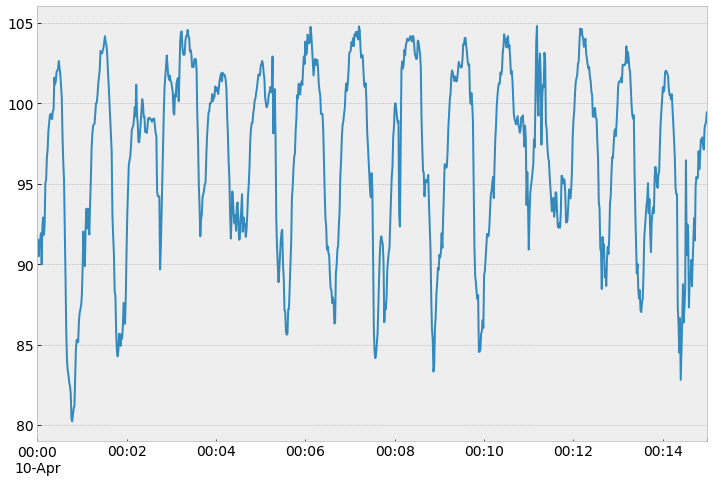

In [10]:
from matplotlib import pyplot
#plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
mpl.rc_context({'lines.linewidth': 2})
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.figsize'] = (12,8)
HR2.plot()
pyplot.show()

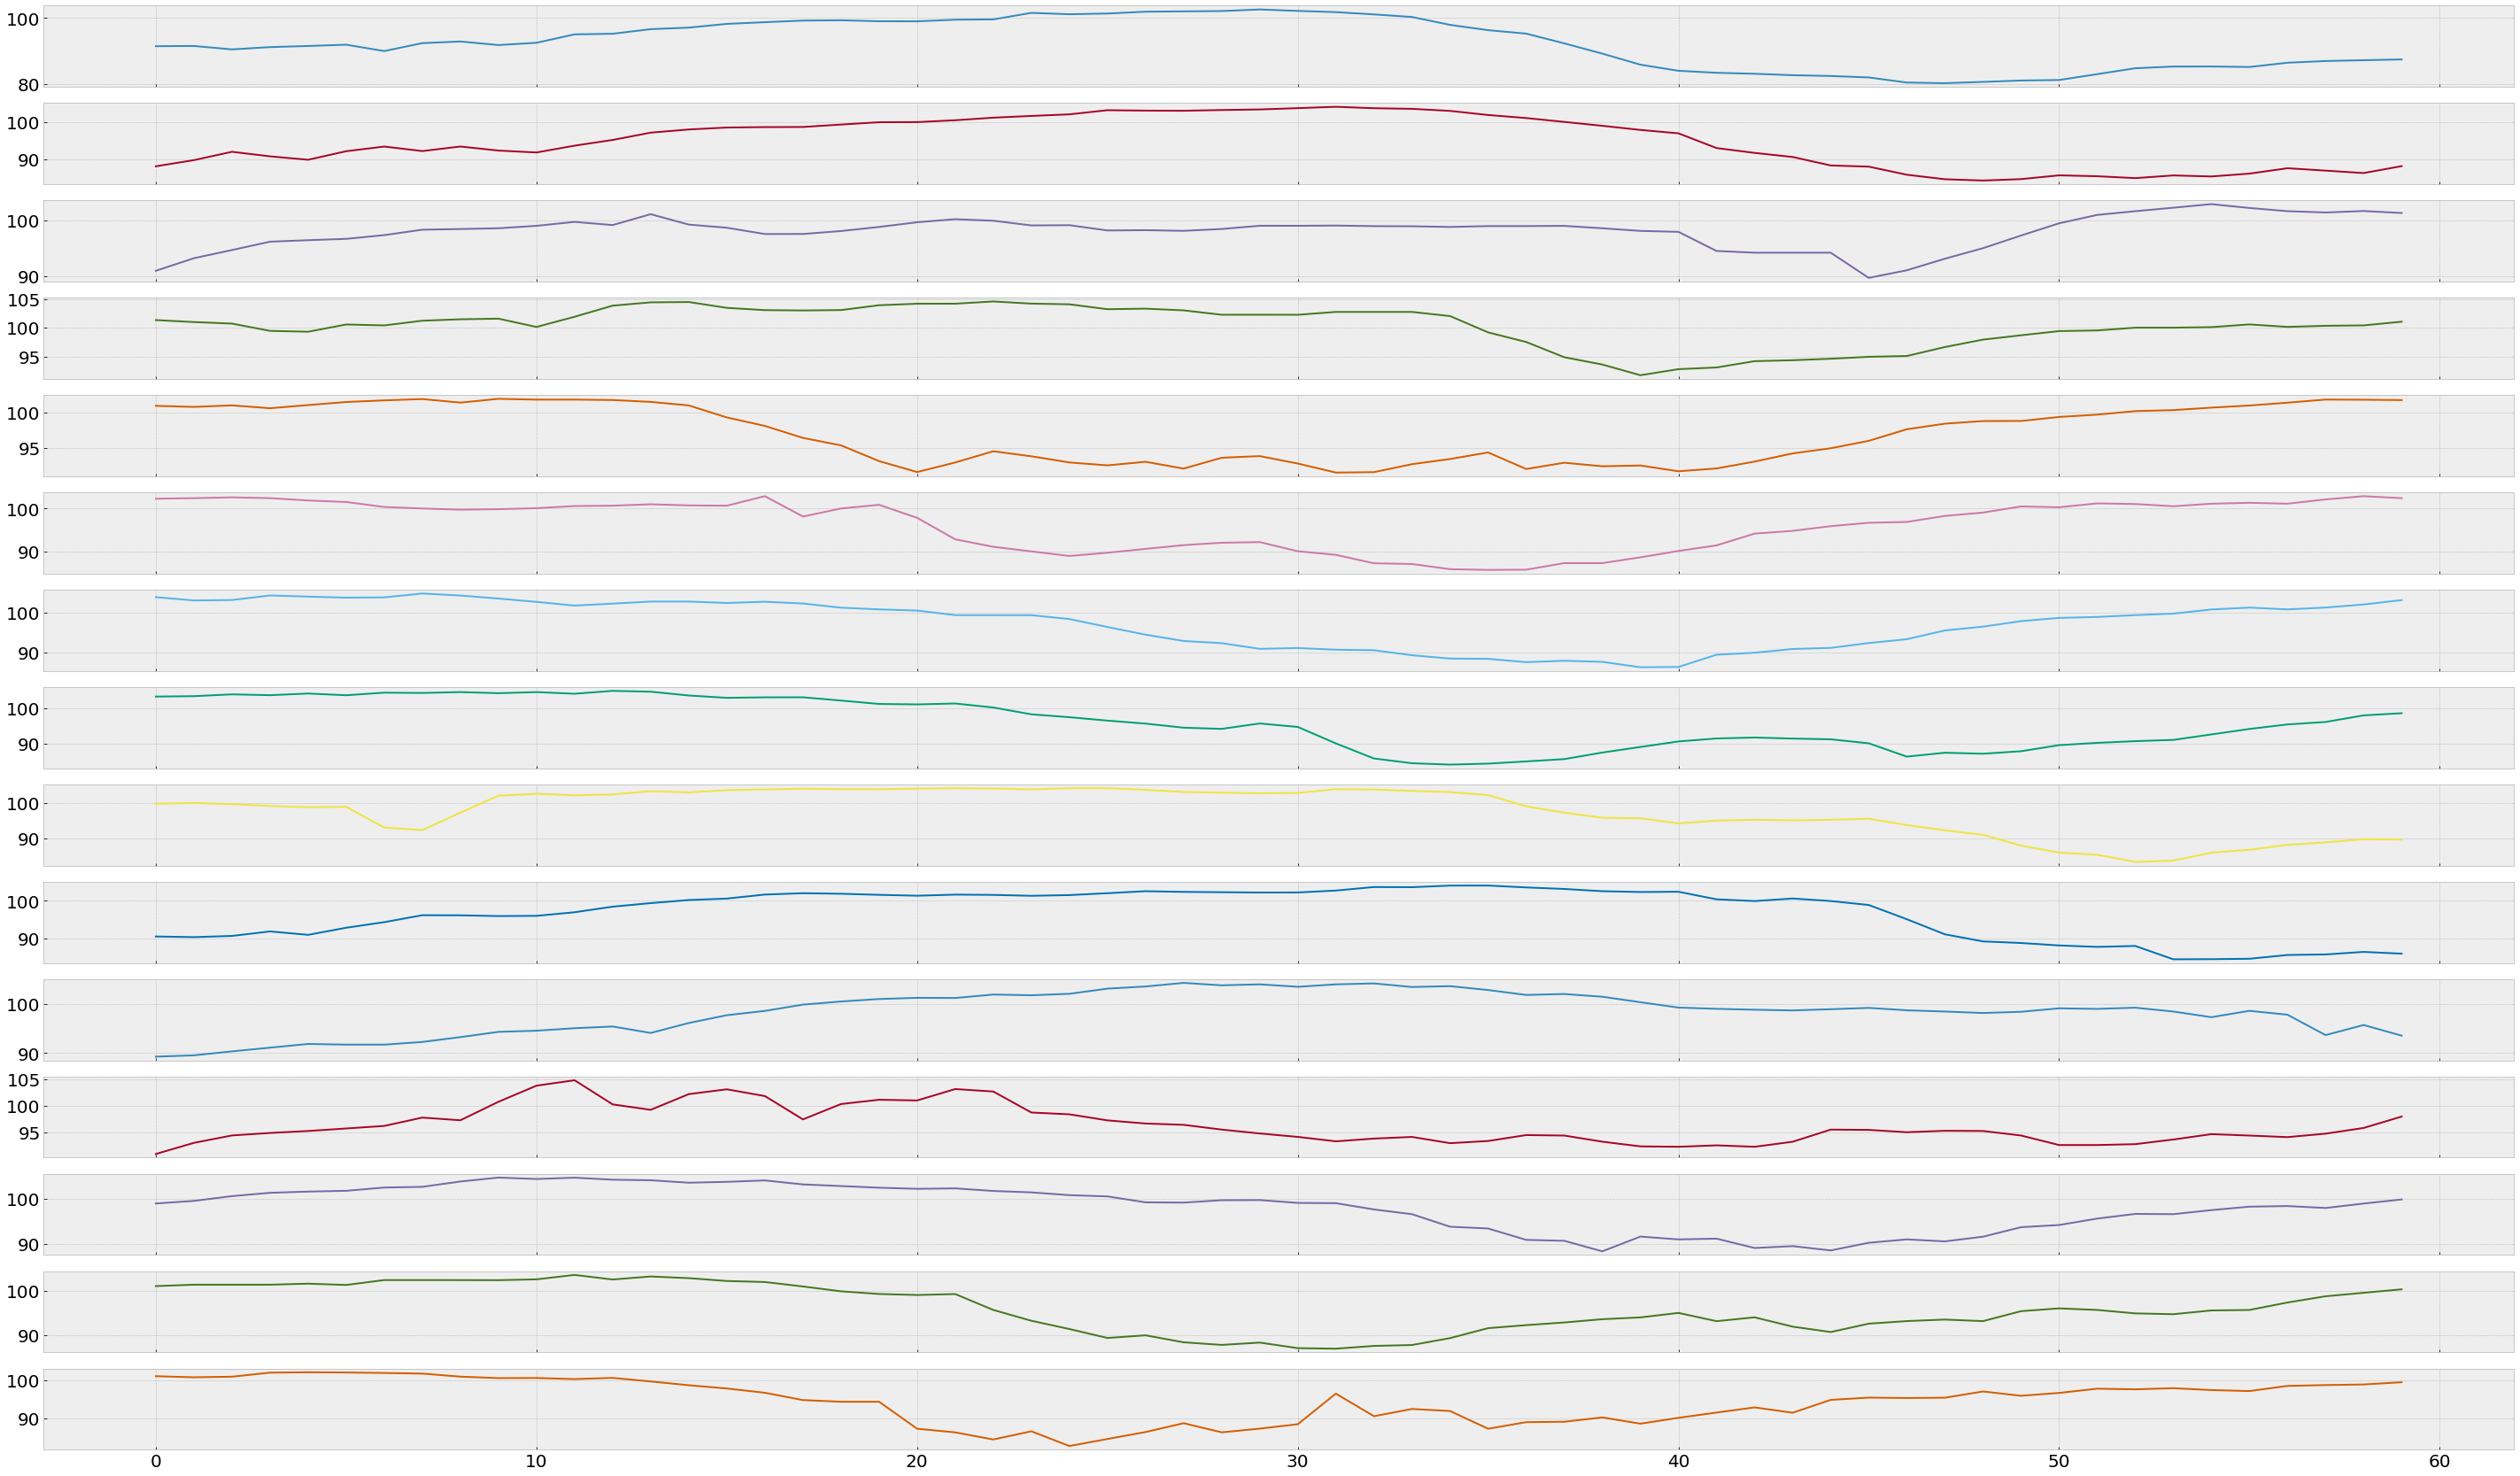

In [11]:
from pandas import Grouper
from pandas import DataFrame
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['figure.figsize'] = (50, 30)

#plt.figure(num=None, figsize=(50, 30), dpi=80, facecolor='w', edgecolor='k')
groups = HR2.groupby(Grouper(freq='T'))
minutes = DataFrame()
for name, group in groups:
	minutes[name.minute] = group.values
minutes.plot(subplots=True, legend=False)
pyplot.show()

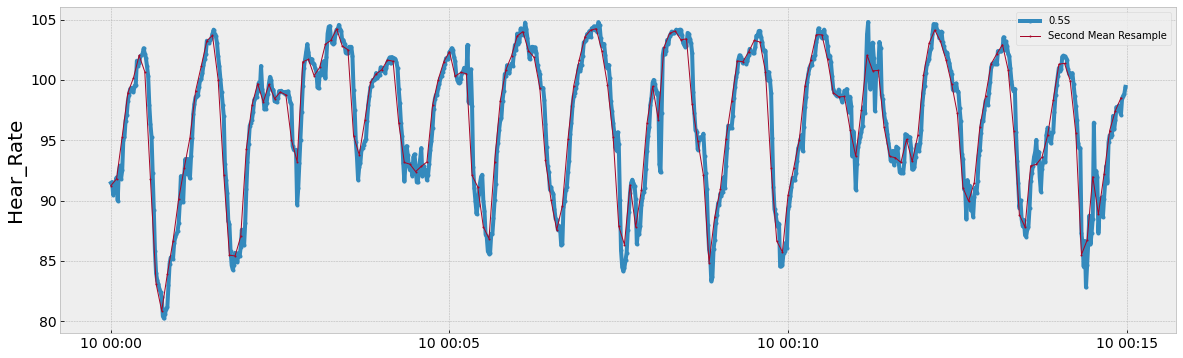

In [12]:
import warnings
import matplotlib.pyplot as plt
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(HR2,marker='.', linestyle='-', linewidth=4, label='0.5S')
ax.plot(HR2.resample('5S').mean(),marker='o', markersize=1,linewidth=1, linestyle='-', label='Second Mean Resample')
ax.set_ylabel('Hear_Rate')
ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


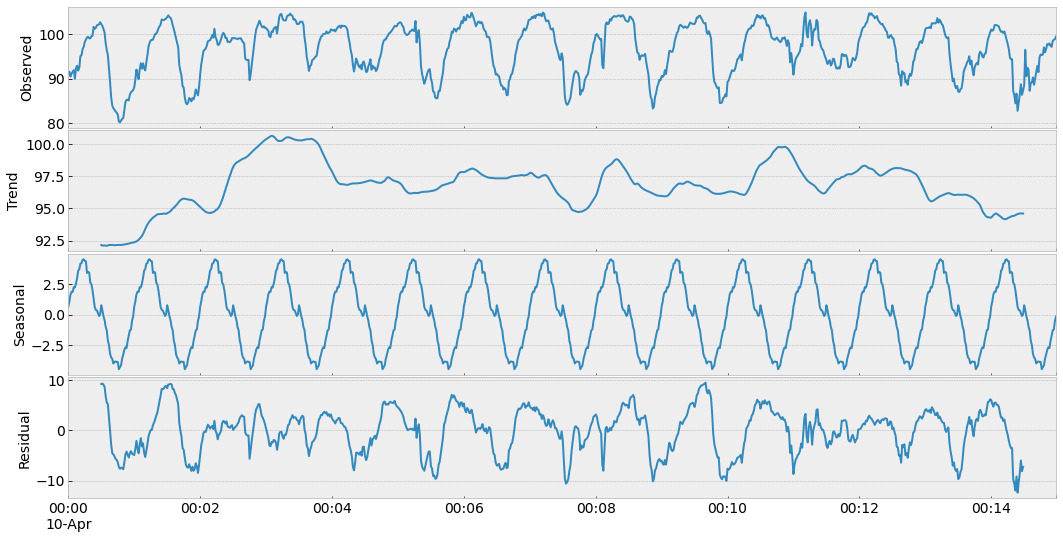

In [13]:
import statsmodels.api as sm
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rc_context({'lines.linewidth': 2})
# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(HR2, model='additive', freq=60)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(HR2)

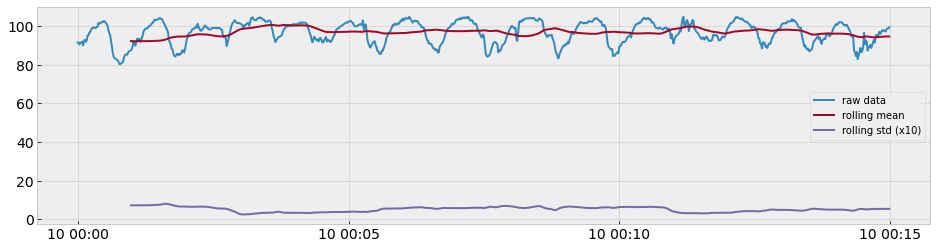

In [14]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=60).mean() 
    rolstd = timeseries.rolling(window=60).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(HR2,'raw data')

In [15]:
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# extracting only the passengers count using values function
values = HR2.values

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -7.974113
p-value: 0.000000
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [16]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
ADF_test(HR2,'raw data')

 > Is the raw data stationary ?
Test statistic = -7.974
P-value = 0.000
Critical values :
	1%: -3.4377943310889303 - The data is  stationary with 99% confidence
	5%: -2.8648262173548456 - The data is  stationary with 95% confidence
	10%: -2.5685198165973295 - The data is  stationary with 90% confidence


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

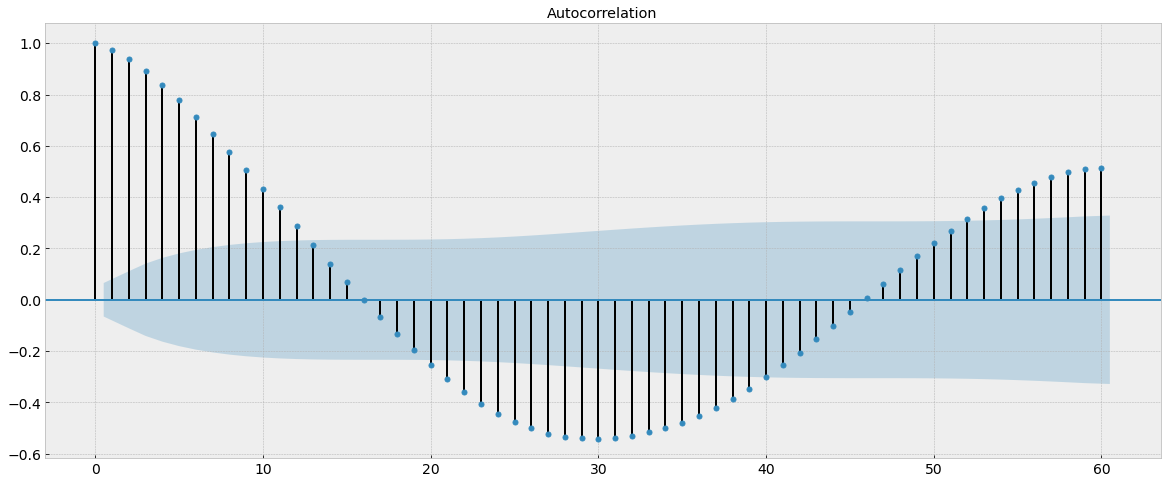

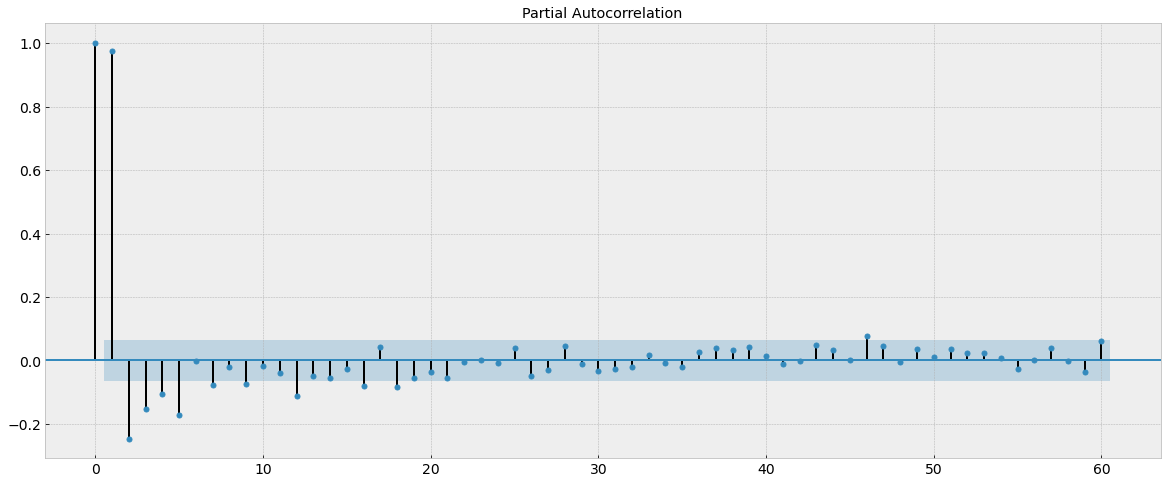

In [18]:
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

plot_acf(values, lags=60)
plot_pacf(values, lags=60)
plt.show()

In [19]:
from statsmodels.tsa import api as smt

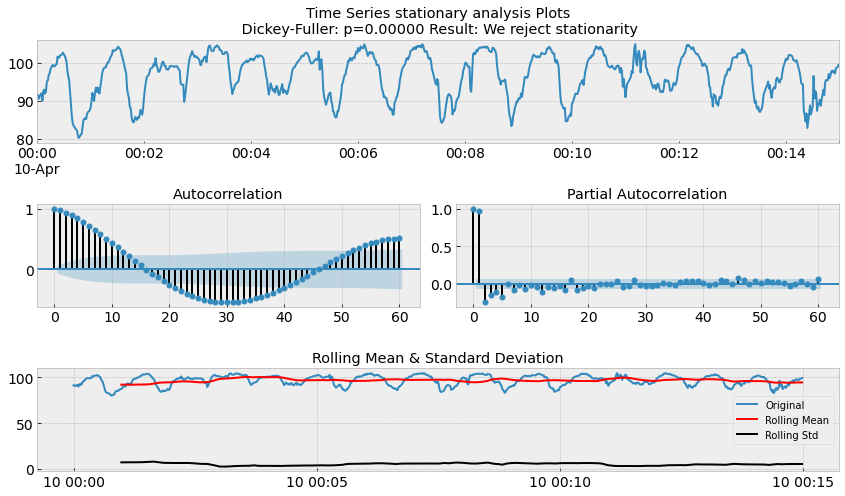

In [20]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
        ts_ax.set_title(
            'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = y.rolling(window=60).mean()
        rolstd = y.rolling(window=60).std()

        # Plot rolling statistics:
        orig = plt.plot(y, label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')


tsplot(HR2, lags=60)

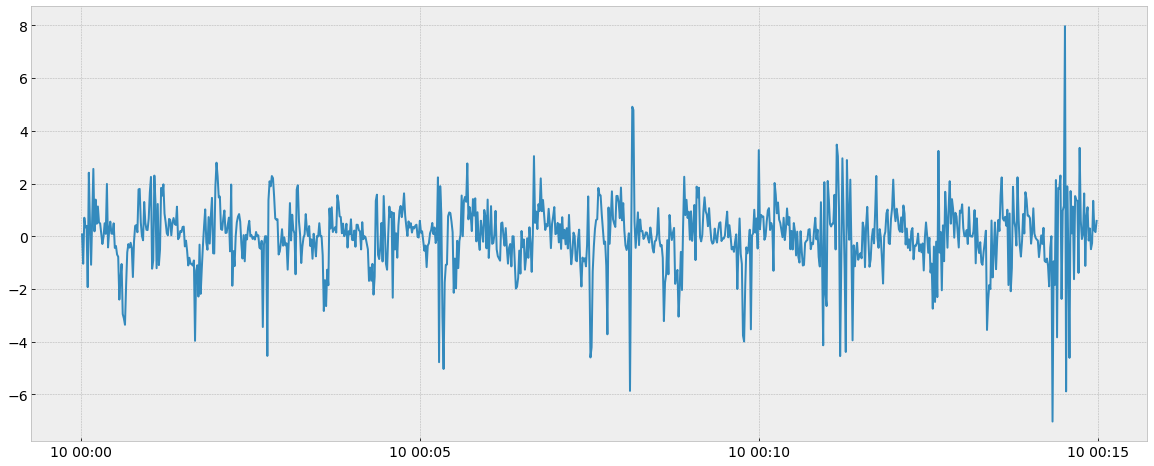

In [21]:
mpl.rc_context({'lines.linewidth': 2})
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
diff = HR2.diff()
pyplot.plot(diff)
pyplot.show()

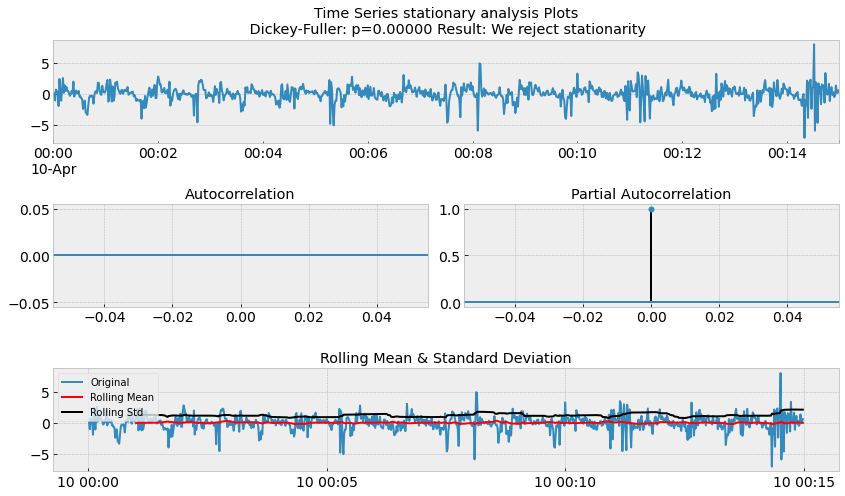

In [22]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

def tsplot(m, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(m, pd.Series):
        m = pd.Series(diff)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        m.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(m.dropna())[1]
        hypothesis_result = "We reject stationarity" if p_value <= 0.05 else "We can not reject stationarity"
        ts_ax.set_title(
            'Time Series stationary analysis Plots\n Dickey-Fuller: p={0:.5f} Result: {1}'.format(p_value, hypothesis_result))
        smt.graphics.plot_acf(m, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(m, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = m.rolling(window=60).mean()
        rolstd = m.rolling(window=60).std()

        # Plot rolling statistics:
        orig = plt.plot(m, label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')

tsplot(diff, lags=60)

In [23]:
import tensorflow as tf
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense
from keras.layers import SimpleRNN
from math import sqrt
from matplotlib import pyplot
from numpy import array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [24]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
		#agg = agg[agg.notna()]
	return agg

In [25]:
# create a differenced series
def difference(dataset, interval=1, dropnan=True):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
		
	return Series(diff)

In [26]:
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

In [27]:
#fit an RNN network to training data

def Simple_RNN(train, n_lag, n_seq, n_batch, n_epoch, n_neurons1, n_neurons2, n_neurons3):
    #reshape training into [samples, timesteps, fetures]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    #design the network
    model = keras.Sequential()
    model.add(SimpleRNN(n_neurons1, activation='relu',return_sequences=True,
                   batch_input_shape=(n_batch, X.shape[1], X.shape[2])))
    model.add(Dropout(0.4))
    model.add(SimpleRNN(n_neurons2, activation='relu',return_sequences=True,
                   batch_input_shape=(n_batch, X.shape[1], X.shape[2])))
    model.add(SimpleRNN(n_neurons3, activation='relu',return_sequences=True,
                   batch_input_shape=(n_batch, X.shape[1], X.shape[2])))
    model.add(Dropout(0.4))
    model.add(layers.Dense(1))



    #compile model
    #opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer='adam')
     # define learning rate schedule
    rlrp = ReduceLROnPlateau(monitor='loss', factor=0.0001, patience=5, min_delta=1E-7, verbose=1)
    #fit network
    for i in range(n_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False, callbacks=[rlrp])
        model.reset_states()
    return model



In [28]:
# make one forecast with an RNN network,
def forecast_RNN(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

In [29]:
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_RNN(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

In [30]:
# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

In [31]:
# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

In [37]:
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual1 = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual1, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

In [38]:
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

In [39]:
# configure
n_lag = 3
n_seq = 4
n_test = 180
n_epochs = 11
n_batch = 1
n_neurons1 = 60
n_neurons2 = 80     
n_neurons3 = 40
# prepare data
scaler, train, test = prepare_data(HR2, n_test, n_lag, n_seq)
# fit model
model = Simple_RNN(train, n_lag, n_seq, n_batch, n_epochs, n_neurons1, n_neurons2, n_neurons3)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(HR2, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(HR2, actual, scaler, n_test+2)
#actual =  list(np.around(np.array(actual),2))
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(HR2, forecasts, n_test+2)

713/713 [==============================] - 2s 3ms/step - loss: 0.0255 - lr: 0.0010
t+1 RMSE: 1.499509


IndexError: ignored